In [975]:
import pandas as pd
import os
import numpy as np
from keras import utils
from tensorflow.keras.callbacks import TensorBoard
from time import time
import tensorflow as tf

In [1003]:
question3 = pd.read_csv('/kaggle/input/datasetar/Data/Question_3.csv', sep=',')
question3.head()

,ID,Question,Réponse,Score
0,3,لماذا سمِّي العام العاشر من البعثة عام الحزن؟,لأنَّه توفِّي أقرب النَّاس لقلب النَّبيِّ -صلّ...,2
1,3,لماذا سمِّي العام العاشر من البعثة عام الحزن؟,لأنَّ العام العاشر من البعثة شهد وفاة أقرب الن...,1
2,3,لماذا سمِّي العام العاشر من البعثة عام الحزن؟,بسبب وفاة زوجة النبي -صلى الله عليه وسلم- خديج...,1
3,3,لماذا سمِّي العام العاشر من البعثة عام الحزن؟,لأنَّ العام العاشر شهد وفاة عمُّ النَّبي -صلى ...,1
4,3,لماذا سمِّي العام العاشر من البعثة عام الحزن؟,بسبب الأحداث الحزينة التي وقعت في العام العاشر...,0


In [1004]:
question3['Score'].unique()

array([2, 1, 0])

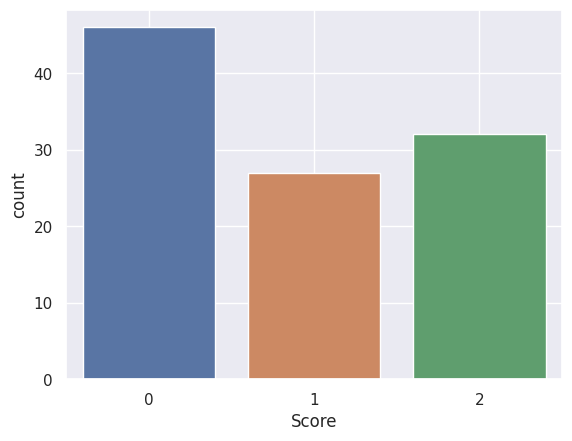

In [1005]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = question3, x= 'Score')
plt.grid(True)
plt.show()

In [1006]:
question3.isnull().sum()

ID          0
Question    0
Réponse     0
Score       0
dtype: int64

In [1007]:
rows_with_null_values = question3[question3['Réponse'].isnull()]

# Now you can display or inspect the rows
print(rows_with_null_values)

Empty DataFrame
Columns: [ID, Question, Réponse, Score]
Index: []


In [714]:
# Assuming your DataFrame is named 'question4'
#
# question2.dropna(subset=['Réponse'], inplace=True)


In [982]:
# question2['Réponse'].isna().sum()

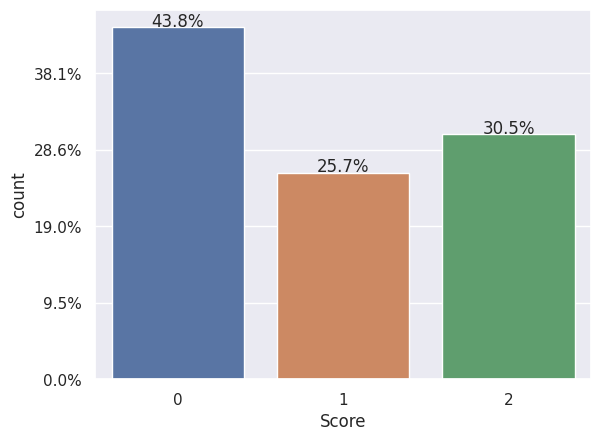

In [1008]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'data' is your DataFrame and 'Score' is a column in your DataFrame
sns.set(style="darkgrid")

# Create the count plot
ax = sns.countplot(data=question3, x='Score')

# Calculate the percentage of each category
total = len(question3)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total:.1%}', ha="center")

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

plt.show()

In [1009]:
question3.shape

(105, 4)

In [1010]:
question3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        105 non-null    int64 
 1   Question  105 non-null    object
 2   Réponse   105 non-null    object
 3   Score     105 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [1011]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset
# Replace 'your_column' with the actual column name you want to check for duplicates

# Check for duplicates based on all columns
duplicate_rows = question3[question3.duplicated()]

# Check for duplicates based on a specific column
duplicate_rows_specific_column = question3[question3.duplicated(subset=['Réponse'])]

# Get the number of duplicates
num_duplicates = len(duplicate_rows)
num_duplicates_specific_column = len(duplicate_rows_specific_column)

print(f"Total duplicates: {num_duplicates}")
print(f"Duplicates in 'Réponse': {num_duplicates_specific_column}")


Total duplicates: 5
Duplicates in 'Réponse': 5


In [300]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [301]:
!pip install -U nltk

In [1012]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))
#stop_words

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1013]:
#data avant stopwrds removed
question3['Réponse']

0      لأنَّه توفِّي أقرب النَّاس لقلب النَّبيِّ -صلّ...
1      لأنَّ العام العاشر من البعثة شهد وفاة أقرب الن...
2      بسبب وفاة زوجة النبي -صلى الله عليه وسلم- خديج...
3      لأنَّ العام العاشر شهد وفاة عمُّ النَّبي -صلى ...
4      بسبب الأحداث الحزينة التي وقعت في العام العاشر...
                             ...                        
100    وفاة خديجة وأبو طالب ألقت بثقلها على قلب النبي...
101    العام العاشر من البعثة سُمي عام الحزن لوفاة أق...
102    تم تسمية العام العاشر من البعثة بعام الحزن بسب...
103    في عام العاشر من البعثة، توفيت زوجة النبي صلى ...
104    العام العاشر من البعثة وُصِف بعام الحزن نتيجة ...
Name: Réponse, Length: 105, dtype: object

In [1014]:
#Drop stop words
from nltk.stem.arlstem import ARLSTem
stemmmer = ARLSTem()

def remove_stowords(elements):
    corps = []
    for string in elements :
        string = nltk.sent_tokenize(string.strip())
        string = [ stemmmer.stem(word) for word in string if not word in stop_words ]
        string = ''.join(string)
        corps.append(string)
    return corps

In [1015]:
corps3 = remove_stowords(question3['Réponse'])

In [566]:
#data after applying stopwords
# corps10

In [1016]:
# tokenization
from keras.preprocessing.text import Tokenizer,text_to_word_sequence , one_hot , text_to_word_sequence
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle




# Train tokenization
tokenizer = Tokenizer(filters=''''!"#$%&()+,-./:;<=>?@[\\]^{|}~\t\n÷×؛<>()&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )
#tokenizer = Tokenizer(filters='#' )

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(corps3)

with open('TokenizerModel3.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(corps3)

# Pad sequences to ensure uniform length
max_sequence_length = max(len(s) for s in sequences)
sequences = pad_sequences(sequences, max_sequence_length)

# Get the word-to-index mapping
vocab_dict = tokenizer.word_index

# Calculate the vocabulary size
vocab_size = len(vocab_dict) + 1

#print(vocab_dict)

In [1017]:
max_sequence_length

28

In [1018]:
# vocab_dict

In [38]:
!pip3 install gensim

In [39]:
from gensim.models import KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format("/kaggle/input/fast-text-translation-data/fast_text_files/vectors/wiki.ar.vec")

In [1019]:
# Word Embedding
from keras.layers import Embedding
import numpy as np

# Embedding Dimension
EMBEDDING_DIM = 300

# Total number of words in the vocabulary, including an index for unknown words
num_words = len(vocab_dict) + 1

# Counter for words not present in the FastText model
count = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

# Iterate through each word in the vocabulary
for word, idx in vocab_dict.items():
    # Check if the word is present in the FastText model
    if word in fasttext_model:
        # If yes, assign the FastText model's embedding vector to the word in the matrix
        embedding_matrix[idx] = fasttext_model.get_vector(word)
    else:
        # If the word is not present, increment the counter and print a message
        count += 1
        print("Word does not exist in the vocabulary ---> " + word)

       # Note: We could also assign a special embedding vector for unknown words.
        embedding_matrix[idx] = fasttext_model.get_vector("unk")

Word does not exist in the vocabulary ---> الفقدانات
Word does not exist in the vocabulary ---> احبائه
Word does not exist in the vocabulary ---> خدبجة
Word does not exist in the vocabulary ---> لحميمه
Word does not exist in the vocabulary ---> وداعمه
Word does not exist in the vocabulary ---> والفقدانات
Word does not exist in the vocabulary ---> غمرا
Word does not exist in the vocabulary ---> ماساويا
Word does not exist in the vocabulary ---> لاحبائه
Word does not exist in the vocabulary ---> احباء
Word does not exist in the vocabulary ---> للفقدانات
Word does not exist in the vocabulary ---> تيجة
Word does not exist in the vocabulary ---> بالاحزان
Word does not exist in the vocabulary ---> فقدانات
Word does not exist in the vocabulary ---> سيطرا


In [1020]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23417   , -0.1832    , -0.18110999, ..., -0.39069   ,
         0.13942   ,  0.0017126 ],
       [ 0.024347  , -0.019301  ,  0.075631  , ..., -0.023894  ,
         0.061126  ,  0.3175    ],
       ...,
       [-0.21476001,  0.13739   , -0.10238   , ..., -0.048746  ,
         0.26627001,  0.37270001],
       [ 0.20344999, -0.30836999,  0.062369  , ..., -0.29793   ,
        -0.13269   ,  0.28984001],
       [-0.21412   ,  0.15899   ,  0.34345001, ..., -0.38596001,
        -0.35620001,  0.0079057 ]])

In [1021]:
X = sequences

In [1022]:
# X

In [1023]:
Score = question3['Score']
y = tf.keras.utils.to_categorical(
    Score, num_classes=3, dtype='float32'
)

In [1025]:
# y

In [1026]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1027]:
y_test.shape

(21, 3)

In [1057]:
# from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from keras.layers import Dropout

input_dim=vocab_size
output_dim=33
input_length=max_sequence_length


# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
model.add(LSTM(units=10,kernel_regularizer=l2(0.001)))
model.add(Dense(3, activation='softmax'))

Epoch 1/80
2/2 [==============================] - 3s 669ms/step - loss: 1.1332 - accuracy: 0.3333 - val_loss: 1.1296 - val_accuracy: 0.4762
Epoch 2/80
2/2 [==============================] - 0s 166ms/step - loss: 1.1269 - accuracy: 0.6667 - val_loss: 1.1266 - val_accuracy: 0.5238
Epoch 3/80
2/2 [==============================] - 0s 163ms/step - loss: 1.1205 - accuracy: 0.6667 - val_loss: 1.1236 - val_accuracy: 0.5238
Epoch 4/80
2/2 [==============================] - 0s 164ms/step - loss: 1.1139 - accuracy: 0.6310 - val_loss: 1.1206 - val_accuracy: 0.5238
Epoch 5/80
2/2 [==============================] - 0s 164ms/step - loss: 1.1082 - accuracy: 0.6429 - val_loss: 1.1176 - val_accuracy: 0.4762
Epoch 6/80
2/2 [==============================] - 0s 170ms/step - loss: 1.1011 - accuracy: 0.6071 - val_loss: 1.1144 - val_accuracy: 0.4762
Epoch 7/80
2/2 [==============================] - 0s 35ms/step - loss: 1.0945 - accuracy: 0.5952 - val_loss: 1.1111 - val_accuracy: 0.4762
Epoch 8/80
2/2 [=====

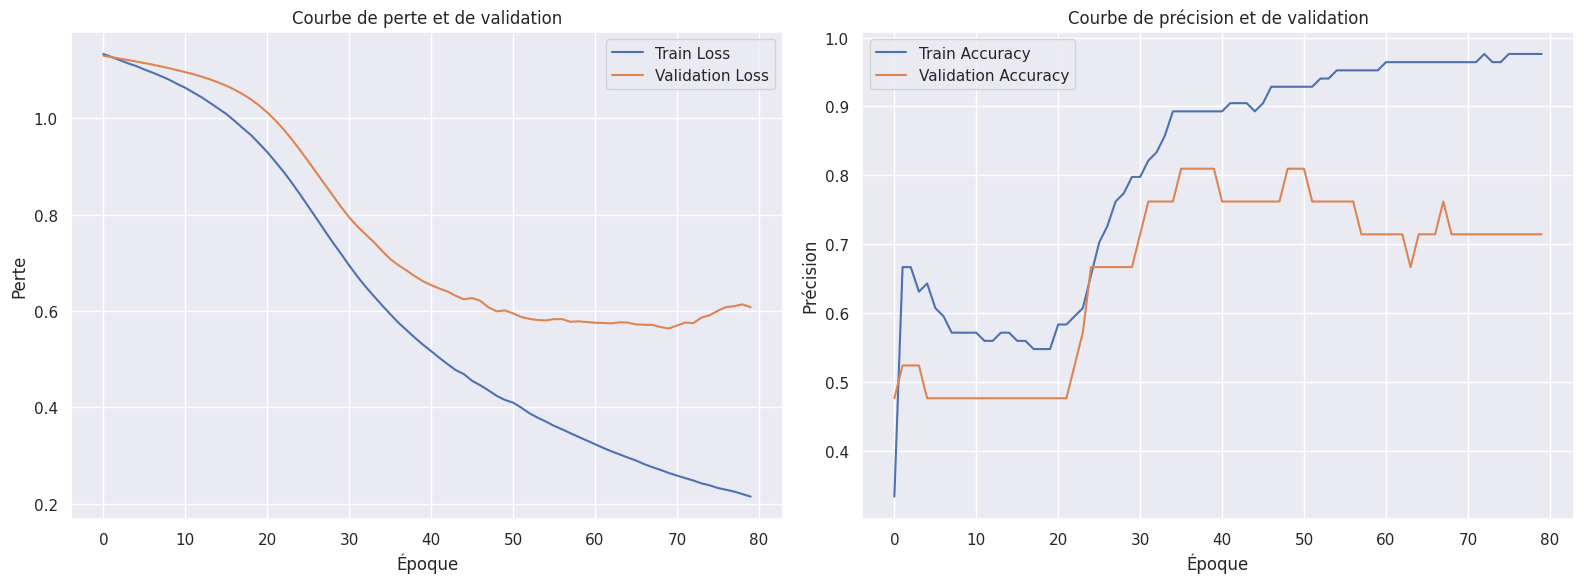

In [1058]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=64, epochs=80, verbose=1)



plt.figure(figsize=(16, 6))
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte et de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()


# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

In [1059]:
scores_trainig = model.evaluate(X_train, y_train, verbose=1)
print("Training Loss: %f%%" % (scores_trainig[0]))
print("Training Accuracy: %.2f%%" % (scores_trainig[1]*100))

3/3 [==============================] - 0s 5ms/step - loss: 0.2106 - accuracy: 0.9762
Training Loss: 0.210592%
Training Accuracy: 97.62%


In [1060]:
scores_test = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss: %f%%" % (scores_test[0]))
print("Test Accuracy: %.2f%%" % (scores_test[1]*100))

1/1 [==============================] - 0s 27ms/step - loss: 0.6080 - accuracy: 0.7143
Test Loss: 0.607995%
Test Accuracy: 71.43%


In [1061]:
import numpy as np

def predict_sequence(model,response):
    
    response= remove_stowords(response)
    #print(corps)
# Convert texts to sequences of integers
    sequences = tokenizer.texts_to_sequences(response)

# Pad sequences to ensure uniform length

    sequences = pad_sequences(sequences, max_sequence_length)
   
    
    #print(sequences)
    # Reshape the input for model prediction
    #input_data = np.array([sequences])
    
    #print(input_data)
    # Make predictions
    predicted_probs = model.predict(sequences)
    predicted_value= np.argmax(predicted_probs, axis=1)
    
    #print(predicted_classes)
   
    return predicted_value[0]

In [1066]:
test=['تم تسمية العام العاشر بعام الحزن بسبب وفاة أبو طالبد ']

In [1067]:
predict_sequence(model,test)

1/1 [==============================] - 0s 20ms/step


1

In [1068]:
from keras.models import load_model

# Assuming 'model' is your Keras model
model.save('model3.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
